CS302(AI)  
AI-VISIONARY

The 10-armed bandit that you developed (bandit_nonstat) is difficult to crack with a standard epsilon-greedy algorithm since the rewards are non-stationary.  We did discuss how to track non-stationary rewards in class.  Write a modified epsilon-greedy agent and show whether it is able to latch onto correct actions or not.  (Try at least 10000 time steps before commenting on results)


In [1]:
import numpy as np

class NonStationaryBandit:
    def __init__(self):
        self.num_arms = 10
        self.mean_rewards = np.zeros(self.num_arms)
        self.time_step = 0
        
    def get_reward(self, action):
        reward = np.random.normal(self.mean_rewards[action], 1)
        self.mean_rewards += np.random.normal(0, 0.01, self.num_arms)
        self.time_step += 1
        return reward

def modified_epsilon_greedy(bandit, epsilon):
    num_arms = bandit.num_arms
    estimates = np.zeros(num_arms)
    counts = np.zeros(num_arms)
    
    for i in range(10000):
        if np.random.rand() < epsilon:
            action = np.random.randint(num_arms)
        else:
            action = np.argmax(estimates)
        reward = bandit.get_reward(action)
        counts[action] += 1
        step_size = 0.1 / counts[action]
        estimates[action] += step_size * (reward - estimates[action])
    
    return estimates

bandit = NonStationaryBandit()
estimates = modified_epsilon_greedy(bandit, 0.1)
print("Estimated rewards:", estimates)
print("True rewards:", bandit.mean_rewards)


Estimated rewards: [ 0.12235553  0.21290462 -0.23831169 -0.12121551  0.1857854   0.1170968
  0.04147803  0.18417747 -0.02073528  0.02897361]
True rewards: [-0.08035948  0.43455109 -0.64452407  0.05312593  1.66702678  1.42254389
  1.06821346 -1.29127185  0.19340694  0.23866792]


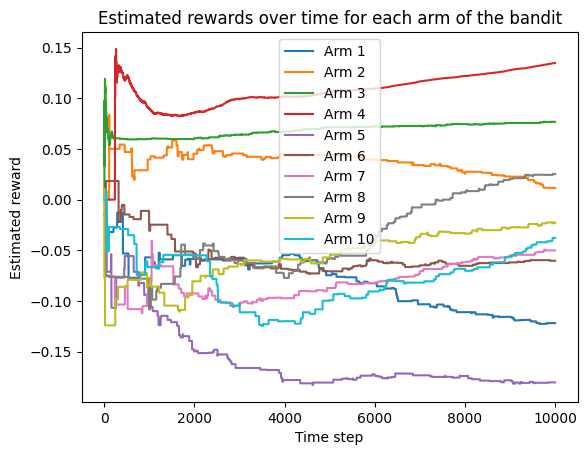

In [2]:
import matplotlib.pyplot as plt

bandit = NonStationaryBandit()

rewards = np.zeros((10000, bandit.num_arms))

estimates = np.zeros(bandit.num_arms)
counts = np.zeros(bandit.num_arms)

for i in range(10000):
    if np.random.rand() < 0.1:
        action = np.random.randint(bandit.num_arms)
    else:
        action = np.argmax(estimates)
    reward = bandit.get_reward(action)
    counts[action] += 1
    step_size = 0.1 / counts[action]
    estimates[action] += step_size * (reward - estimates[action])
    rewards[i] = estimates

for i in range(bandit.num_arms):
    plt.plot(range(10000), rewards[:, i], label='Arm {}'.format(i+1))

plt.xlabel('Time step')
plt.ylabel('Estimated reward')
plt.title('Estimated rewards over time for each arm of the bandit')
plt.legend()
plt.show()
